In [1]:
import pandas as pd
import numpy as np
import itertools
import tensorflow as tf
import keras
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import os



Using TensorFlow backend.


In [11]:
training_data = pd.read_csv('data/train.csv');
testing_data = pd.read_csv('data/test.csv');

In [12]:
display(training_data);
display(testing_data);


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = training_data.iloc[:,0:1].values
x = training_data.iloc[:,1:].values

In [13]:
x = x/255.0;
testing_data = testing_data.values/255.0;
x = x.reshape(-1, 28,28,1);
testing_data = testing_data.reshape(-1,28,28,1);

In [14]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1);

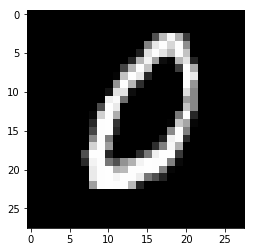

In [15]:
plt.imshow(x_train[27971][:,:,0], cmap="gray")
plt.show()


In [ ]:
# optim = Adam()
model = tf.keras.models.Sequential()
es = EarlyStopping(patience = 3)
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)

model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu' , padding='same'))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu' , padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding = 'same'))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding = 'same'))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding = 'same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer=adam, loss="sparse_categorical_crossentropy",  metrics = ['accuracy'] )

model.fit(x_train, y_train, epochs = 5, callbacks=[es], validation_data=(x_test, y_test) )

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
 1760/37800 [>.............................] - ETA: 48:46 - loss: 2.3057 - acc: 0.1011

In [11]:
submission = model.predict(testing_data);
submission = np.argmax(submission, axis = 1)
submission = pd.Series(submission,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)

submission.to_csv("submission_v2.csv",index=False)
print(submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
5            6      7
6            7      0
7            8      3
8            9      0
9           10      3
10          11      5
11          12      7
12          13      4
13          14      0
14          15      4
15          16      3
16          17      3
17          18      1
18          19      9
19          20      0
20          21      9
21          22      1
22          23      1
23          24      5
24          25      7
25          26      4
26          27      2
27          28      7
28          29      4
29          30      7
...        ...    ...
27970    27971      5
27971    27972      0
27972    27973      4
27973    27974      8
27974    27975      0
27975    27976      3
27976    27977      6
27977    27978      0
27978    27979      1
27979    27980      9
27980    27981      3
27981    27982      1
27982    27983      1
27983    2

In [10]:
model = tf.keras.models.Sequential();
model.add(tf.keras.layers.Flatten());
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu));
model.add(tf.keras.layers.Dense(300, activation = tf.nn.relu));
model.add(tf.keras.layers.Dense(300, activation = tf.nn.relu));
model.add(tf.keras.layers.Dense(128, activation = tf.nn.softmax));
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer ='adam' ,
             loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy']   
             )
model.fit(x_train, y_train, epochs = 20);

Epoch 1/20
37800/37800 [==============================] - 53s 1ms/step - loss: 0.2951 - acc: 0.9113
Epoch 2/20
37800/37800 [==============================] - 56s 1ms/step - loss: 0.1203 - acc: 0.9628
Epoch 3/20
37800/37800 [==============================] - 58s 2ms/step - loss: 0.0803 - acc: 0.9746
Epoch 4/20
37800/37800 [==============================] - 50s 1ms/step - loss: 0.0645 - acc: 0.9794
Epoch 5/20
37800/37800 [==============================] - 56s 1ms/step - loss: 0.0535 - acc: 0.9828
Epoch 6/20
37800/37800 [==============================] - 45s 1ms/step - loss: 0.0456 - acc: 0.9847
Epoch 7/20
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0382 - acc: 0.9879
Epoch 8/20
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0292 - acc: 0.9902
Epoch 9/20
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0315 - acc: 0.9900
Epoch 10/20
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0284 - acc: 0.9913